# Ecommerce Customer Behaviour

## Understanding the data, data structure and setting the environment

In [7]:
# Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Source

This analysis is based on a dataset downloaded from Kaggle:  
[E-Commerce Data Science Project – Input Dataset](https://www.kaggle.com/code/yassmen/data-science-project/input)  
Provided by: **Yassmen Eid**  
Used here for non-commercial, educational purposes.

In [8]:
# Import data and read initial 10 rows

raw_data = pd.read_csv('ecommerce_customer_data_large.csv') 
raw_data.head(10)

Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        44605  2023-05-03 21:30:02             Home            177         1   
1        44605  2021-05-16 13:57:44      Electronics            174         3   
2        44605  2020-07-13 06:16:57            Books            413         1   
3        44605  2023-01-17 13:14:36      Electronics            396         3   
4        44605  2021-05-01 11:29:27            Books            259         4   
5        13738  2022-08-25 06:48:33             Home            191         3   
6        13738  2023-07-25 05:17:24      Electronics            205         1   
7        13738  2023-02-05 19:31:48            Books            370         5   
8        13738  2021-12-21 03:29:05             Home             12         2   
9        13738  2023-02-09 00:53:14      Electronics             40         4   

   Total Purchase Amount Payment Method  Customer Age  Returns  \
0                   2427         PayPal            31      1.0   
1                   2448         PayPal            31      1.0   
2                   2345    Credit Card            31      1.0   
3                    937           Cash            31      0.0   
4                   2598         PayPal            31      1.0   
5                   3722    Credit Card            27      1.0   
6                   2773    Credit Card            27      NaN   
7                   1486           Cash            27      1.0   
8                   2175           Cash            27      NaN   
9                   4327           Cash            27      0.0   

    Customer Name  Age  Gender  Churn  
0     John Rivera   31  Female      0  
1     John Rivera   31  Female      0  
2     John Rivera   31  Female      0  
3     John Rivera   31  Female      0  
4     John Rivera   31  Female      0  
5  Lauren Johnson   27  Female      0  
6  Lauren Johnson   27  Female      0  
7  Lauren Johnson   27  Female      0  
8  Lauren Johnson   27  Female      0  
9  Lauren Johnson   27  Female      0

In [9]:
# Understanding the data and dataset like the number of rows, columns, column names, data type and some statistical features like mean, standard deviation etc
raw_data.shape

(250000, 13)

In [10]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [11]:
raw_data.describe()

Customer ID  Product Price       Quantity  Total Purchase Amount  \
count  250000.000000  250000.000000  250000.000000          250000.000000   
mean    25017.632092     254.742724       3.004936            2725.385196   
std     14412.515718     141.738104       1.414737            1442.576095   
min         1.000000      10.000000       1.000000             100.000000   
25%     12590.000000     132.000000       2.000000            1476.000000   
50%     25011.000000     255.000000       3.000000            2725.000000   
75%     37441.250000     377.000000       4.000000            3975.000000   
max     50000.000000     500.000000       5.000000            5350.000000   

        Customer Age        Returns            Age         Churn  
count  250000.000000  202618.000000  250000.000000  250000.00000  
mean       43.798276       0.500824      43.798276       0.20052  
std        15.364915       0.500001      15.364915       0.40039  
min        18.000000       0.000000      18.000000       0.00000  
25%        30.000000       0.000000      30.000000       0.00000  
50%        44.000000       1.000000      44.000000       0.00000  
75%        57.000000       1.000000      57.000000       0.00000  
max        70.000000       1.000000      70.000000       1.00000

## Data pre-processing

In [13]:
# Identify the unique values

raw_data.nunique()

Customer ID               49661
Purchase Date            249728
Product Category              4
Product Price               491
Quantity                      5
Total Purchase Amount      5245
Payment Method                3
Customer Age                 53
Returns                       2
Customer Name             39878
Age                          53
Gender                        2
Churn                         2
dtype: int64

In [14]:
# Find out the null values

raw_data.isnull().sum() 

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [15]:
# Identify duplicate rows

raw_data.duplicated().sum()

0

### Potential issues with the dataset  
1. Purchase date is Object type. Convert Purchase Date column into Datetime.
2. Adjust Null (NaN) values in Returns column. Returns column contains information about Returns (1) or non returned (0) items. We assume a 3. missing NaN value means the product is not returned. So, we will convert NaN valuses in Returns column to 0.
4. Returns column is float type. Convert it to Int datatype.
5. Columns customer Age and Age appear to contain the same information. We can drop either column.  
Before proceeding to rectify these issues, it is good idea to make a copy of the original dataset. We will make corrections in this duplicate copy of the dataset and the original data would remain untouched.

## Data Cleaning

In [18]:
# Copy the dataset

clean_data = raw_data.copy()

In [19]:
# Fill NaN values with 0
clean_data['Returns'] = clean_data['Returns'].fillna(0)

# Convert datatype to integer
clean_data['Returns'] = clean_data['Returns'].astype(int)

In [20]:
# Convert Purchase Date to datetime
clean_data['Purchase Date'] = pd.to_datetime(clean_data['Purchase Date'])

# It may be a good idea to split the year and month from datetime column and store them as separate columns. We may use this information in further analysis.
clean_data['Year'] = clean_data['Purchase Date'].dt.year
clean_data['Month'] = clean_data['Purchase Date'].dt.month_name()
clean_data['Day'] = clean_data['Purchase Date'].dt.day
clean_data['Date'] = clean_data['Purchase Date'].dt.date

In [21]:
# Drop repeated column

clean_data.drop(columns = ['Customer Age'], inplace = True)

In [22]:
# Verify the clean_data before proceeding if the initial issues have been resolved without compromise on data values

clean_data.head()
clean_data.info()
clean_data.describe()
clean_data.shape
clean_data.nunique()
clean_data.isnull().sum()
clean_data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Returns                250000 non-null  int64         
 8   Customer Name          250000 non-null  object        
 9   Age                    250000 non-null  int64         
 10  Gender                 250000 non-null  object        
 11  Churn                  250000 non-null  int64         
 12  Year                   250000 non-null  int3

0

In [23]:
clean_data.head()

Customer ID       Purchase Date Product Category  Product Price  Quantity  \
0        44605 2023-05-03 21:30:02             Home            177         1   
1        44605 2021-05-16 13:57:44      Electronics            174         3   
2        44605 2020-07-13 06:16:57            Books            413         1   
3        44605 2023-01-17 13:14:36      Electronics            396         3   
4        44605 2021-05-01 11:29:27            Books            259         4   

   Total Purchase Amount Payment Method  Returns Customer Name  Age  Gender  \
0                   2427         PayPal        1   John Rivera   31  Female   
1                   2448         PayPal        1   John Rivera   31  Female   
2                   2345    Credit Card        1   John Rivera   31  Female   
3                    937           Cash        0   John Rivera   31  Female   
4                   2598         PayPal        1   John Rivera   31  Female   

   Churn  Year    Month  Day        Date  
0      0  2023      May    3  2023-05-03  
1      0  2021      May   16  2021-05-16  
2      0  2020     July   13  2020-07-13  
3      0  2023  January   17  2023-01-17  
4      0  2021      May    1  2021-05-01

In [24]:
import os
os.getcwd()

'/Users/anujanuj/practice.datasets/ecommerece/submission_files_ecommerce'

In [25]:
# Save the clean_data before proceeding further

clean_data.to_csv("clean_data.csv", index = False) # Tells pandas not to write the row index as a separate column in the CSV.

## Feature Engineering

In [27]:
# We would make a master dataframe with customer information. This would contain several columns engineered and may be needed in further analysis.

customer_master_data = clean_data.groupby('Customer ID').agg(
    name = ('Customer Name','first'),
    age = ('Age','first'),
    gender = ('Gender','first'),
    churn = ('Churn', 'first'),
    product_categories = ('Product Category', 'count'),
    total_purchase_amount = ('Total Purchase Amount', 'sum'),
    min_purchase_amount = ('Total Purchase Amount', 'min'),
    max_purchase_amount = ('Total Purchase Amount', 'max'),
    avg_purcahse_amount = ('Total Purchase Amount', 'mean'),
    median_purchase_amount = ('Total Purchase Amount', 'median'),
    total_orders = ('Total Purchase Amount', 'count'),
    total_returns = ('Returns', 'sum'),
    first_order_date = ('Purchase Date', 'min'),
    last_order_date = ('Purchase Date', 'max'),
    count_card_payment = ('Payment Method', lambda x: (x == 'Credit Card').sum()),
    count_paypal_payment = ('Payment Method', lambda x: (x == 'PayPal').sum()),
    count_cash_payment = ('Payment Method', lambda x: (x == 'Cash').sum())
).reset_index()

customer_master_data.head()

Customer ID             name  age  gender  churn  product_categories  \
0            1    Dominic Cline   67  Female      0                   3   
1            2      Crystal Day   42  Female      0                   6   
2            3     Joseph Perez   31    Male      0                   4   
3            4       Wyatt Love   37    Male      0                   5   
4            5  Shannon Hoffman   24  Female      0                   5   

   total_purchase_amount  min_purchase_amount  max_purchase_amount  \
0                   6290                  385                 5148   
1                  16481                  604                 4777   
2                   9423                 1172                 4687   
3                   7826                  429                 2959   
4                   9769                  308                 4227   

   avg_purcahse_amount  median_purchase_amount  total_orders  total_returns  \
0          2096.666667                   757.0             3              0   
1          2746.833333                  2847.5             6              4   
2          2355.750000                  1782.0             4              0   
3          1565.200000                  1362.0             5              3   
4          1953.800000                  1780.0             5              3   

     first_order_date     last_order_date  count_card_payment  \
0 2020-03-04 10:26:02 2022-11-29 06:48:25                   2   
1 2020-07-31 16:27:41 2023-07-03 17:26:19                   1   
2 2020-01-19 00:03:00 2023-02-03 03:58:07                   2   
3 2020-10-12 22:03:10 2022-06-29 03:41:09                   1   
4 2020-04-08 21:57:19 2022-07-16 04:08:09                   2   

   count_paypal_payment  count_cash_payment  
0                     0                   1  
1                     3                   2  
2                     1                   1  
3                     2                   2  
4                     2                   1

In [28]:
gender_master_data = customer_master_data.groupby('gender').agg(
    total = ('Customer ID', 'count'),
    
    average_age = ('age', 'mean'),
    min_age = ('age', 'min'),
    max_age = ('age', 'max'),
    
    churns = ('churn', 'sum'),
    
    total_orders_male_female = ('total_orders', 'sum'),
    mean_orders_male_female = ('total_orders', 'mean'),
    min_orders_male_female = ('total_orders', 'min'),
    max_orders_male_female = ('total_orders', 'max'),

    total_order_value = ('total_purchase_amount', 'sum'),
    mean_order_value = ('total_purchase_amount', 'mean'),
    median_order_value = ('total_purchase_amount', 'median'),
    min_order_value = ('total_purchase_amount', 'min'),
    max_order_value = ('total_purchase_amount', 'max'),
    
    card_payment_male_female = ('count_card_payment', 'sum'),
    cash_payment_male_female = ('count_cash_payment', 'sum'),
    paypal_payment_male_female = ('count_paypal_payment', 'sum')
    
).reset_index()

gender_master_data['churn_percent_of_total_churn'] = round((gender_master_data['churns']/gender_master_data['churns'].sum()) * 100,2)
gender_master_data['churn_percent_within_gender'] = round((gender_master_data['churns']/gender_master_data['total']) *100,2)

gender_master_data

gender  total  average_age  min_age  max_age  churns  \
0  Female  24714    43.822246       18       70    4950   
1    Male  24947    43.843228       18       70    4979   

   total_orders_male_female  mean_orders_male_female  min_orders_male_female  \
0                    124324                 5.030509                       1   
1                    125676                 5.037720                       1   

   max_orders_male_female  total_order_value  mean_order_value  \
0                      16          338559456      13699.095897   
1                      17          342786843      13740.603800   

   median_order_value  min_order_value  max_order_value  \
0             12956.5              125            48499   
1             13059.0              160            50659   

   card_payment_male_female  cash_payment_male_female  \
0                     41609                     41308   
1                     41938                     41704   

   paypal_payment_male_female  churn_percent_of_total_churn  \
0                       41407                         49.85   
1                       42034                         50.15   

   churn_percent_within_gender  
0                        20.03  
1                        19.96

### Initial analysis and visualisation

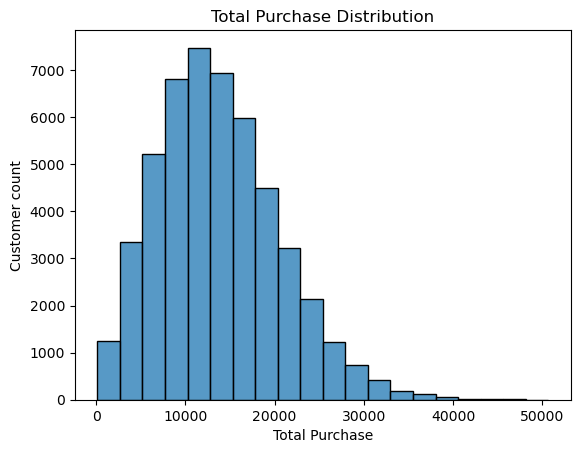

In [30]:
# Distribution of customers by total purchase
sns.histplot(customer_master_data['total_purchase_amount'], bins=20)
plt.title('Total Purchase Distribution')
plt.ylabel('Customer count')
plt.xlabel('Total Purchase')

plt.savefig('total purchase distribution.png', dpi=300, bbox_inches='tight')  # PNG file
plt.savefig('total purchase distribution.pdf', bbox_inches='tight') 
plt.show()

### Analysis by Gender

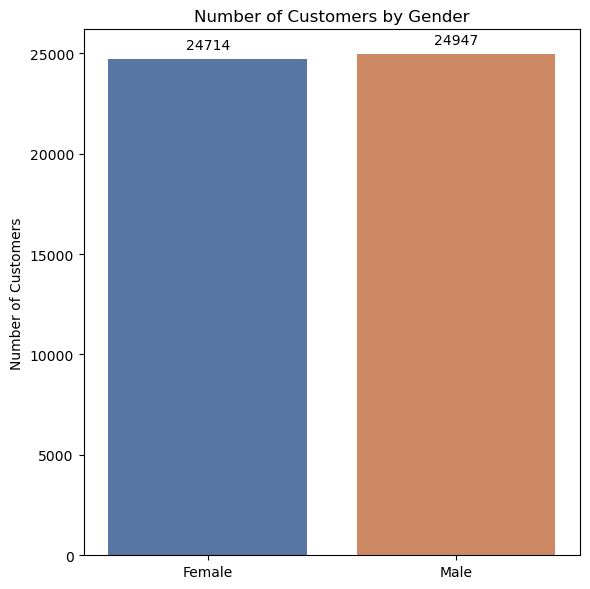

In [32]:
# Creating a bar graph for gender distribution

# Create the plot object
fig1, ax = plt.subplots(figsize=(6, 6))

# Draw the bar plot
sns.barplot(x='gender', y='total', hue='gender', data=gender_master_data,
            palette='deep', ax=ax, legend=False)

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=5)

# Customize labels and title
ax.set_title('Number of Customers by Gender')
ax.set_xlabel('')
ax.set_ylabel('Number of Customers')

# Adjust layout
fig1.tight_layout()

plt.savefig('customers by gender count.png', dpi=300, bbox_inches='tight')  # PNG file
plt.savefig('customers by gender count.pdf', bbox_inches='tight')          # PDF file (optional)

# Show the plot
plt.show()

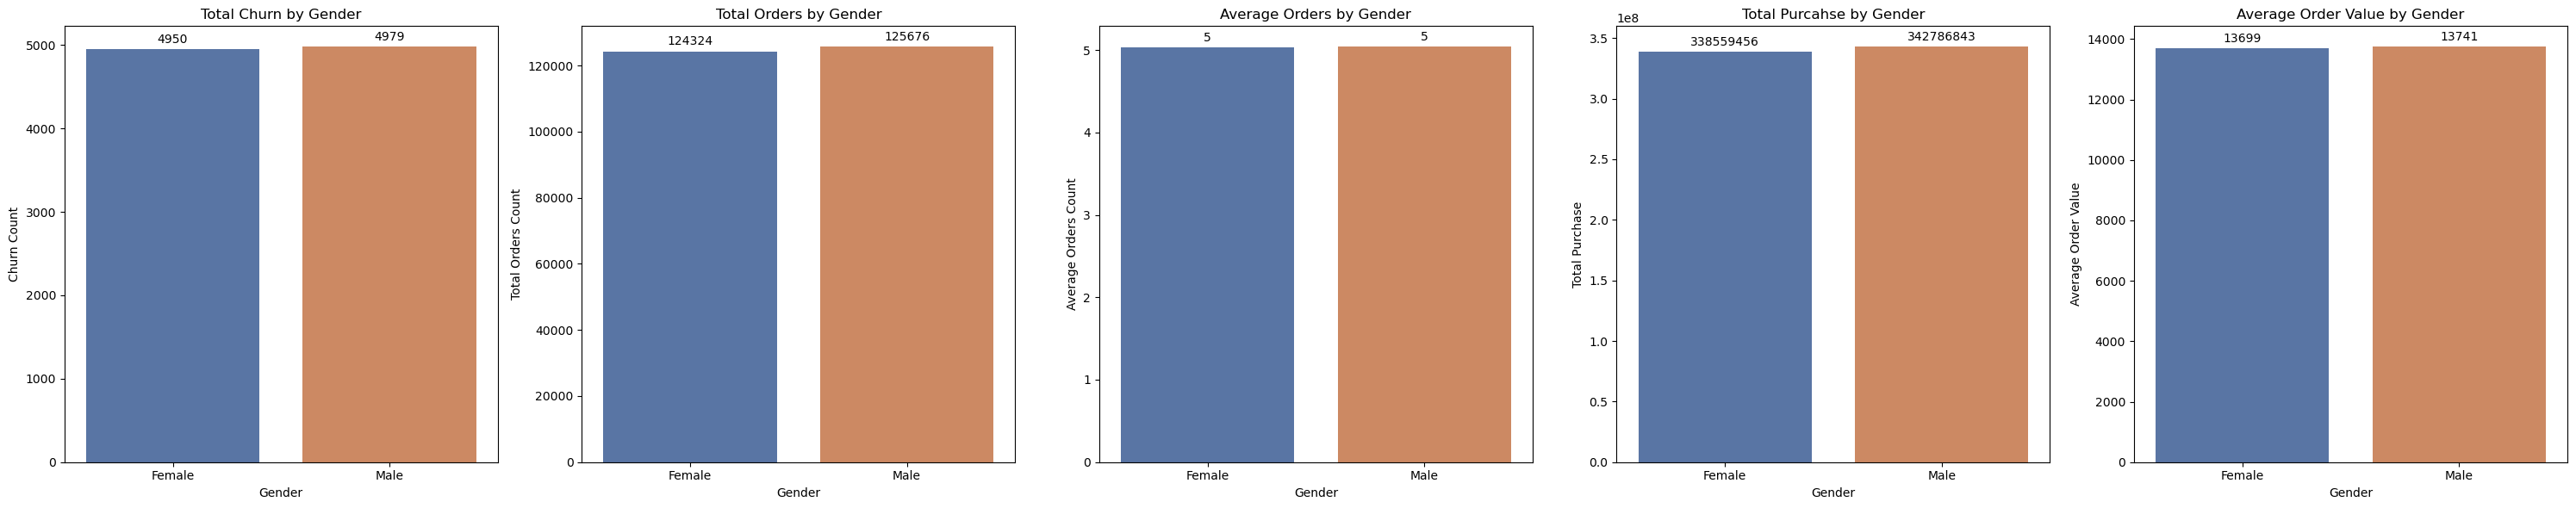

In [33]:
# We can also create multiple bar graphs within one figure

# Set up the figure and 3 axes in a row
fig2, axes = plt.subplots(1, 5, figsize = (30, 6))

# Plot configurations
plots = [
    {
        'y': 'churns',
        'title': 'Total Churn by Gender',
        'ylabel': 'Churn Count',
        'palette': 'deep'
    },
     {
        'y': 'total_orders_male_female',
        'title': 'Total Orders by Gender',
        'ylabel': 'Total Orders Count',
        'palette': 'deep'
    },
    {
        'y': 'mean_orders_male_female',
        'title': 'Average Orders by Gender',
        'ylabel': 'Average Orders Count',
        'palette': 'deep'
    },
    {
        'y': 'total_order_value',
        'title': 'Total Purcahse by Gender',
        'ylabel': 'Total Purchase',
        'palette': 'deep'
    },
    {
        'y': 'mean_order_value',
        'title': 'Average Order Value by Gender',
        'ylabel': 'Average Order Value',
        'palette': 'deep'
    }
]

# Loop through the plots and axes
for ax, plot in zip(axes, plots):
    sns.barplot(
        x = 'gender', y = plot['y'], hue = 'gender',
        data = gender_master_data,
        palette = plot['palette'], ax = ax, legend = False
    )
    ax.set_title(plot['title'])
    ax.set_xlabel('Gender')
    ax.set_ylabel(plot['ylabel'])

    # Add labels manually to each bar
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.0f}',  # integer label
                    xy = (bar.get_x() + bar.get_width() / 2, height),
                    xytext = (0, 3),  # 3 points vertical offset
                    textcoords = "offset points",
                    ha = 'center', va = 'bottom')

# Adjust layout
plt.tight_layout()

# Save the plots. Save the plots before plt.show()
plt.savefig('gender_comparison_plots.png', dpi = 300, bbox_inches = 'tight')  # PNG file
plt.savefig('gender_comparison_plots.pdf', bbox_inches = 'tight')          # PDF file (optional)

plt.show()

The results shows that the both the genders i.e. male and female behave in similar manner considering the total and average of orders and purchase amount.  
Further the count of customer churning and total count of customers is same irrespective of the gender.

### Analysis by Age

In [36]:
# It is a good idea to distribute the customers in different age groups according to their age. To do this, we need to first identify the minimum and maximum age of custoemrs.

min_age = clean_data['Age'].min()
max_age = clean_data['Age'].max()

print(min_age, max_age) 

# Now that we know the minimum age is 18 and maximum age is 70. We can distribute the customers in a range of 18-70.
# To take a more generalised approach we can create different bins.

bins = [0,20,30,40,50,60,70,100] # creating different bins 
labels = ['1-20', '21-30', '31-40', '41-50', '51-60', '61-70', '70+'] # 70+ should ideally have 0 customer in this dataset

# Add a new clolumn agegroup to the customer_master_data. We are not using the clean_data as it contains multiple rows for each customer.

customer_master_data['Age Group'] = pd.cut(customer_master_data['age'], bins = bins, labels = labels, right=True)

18 70


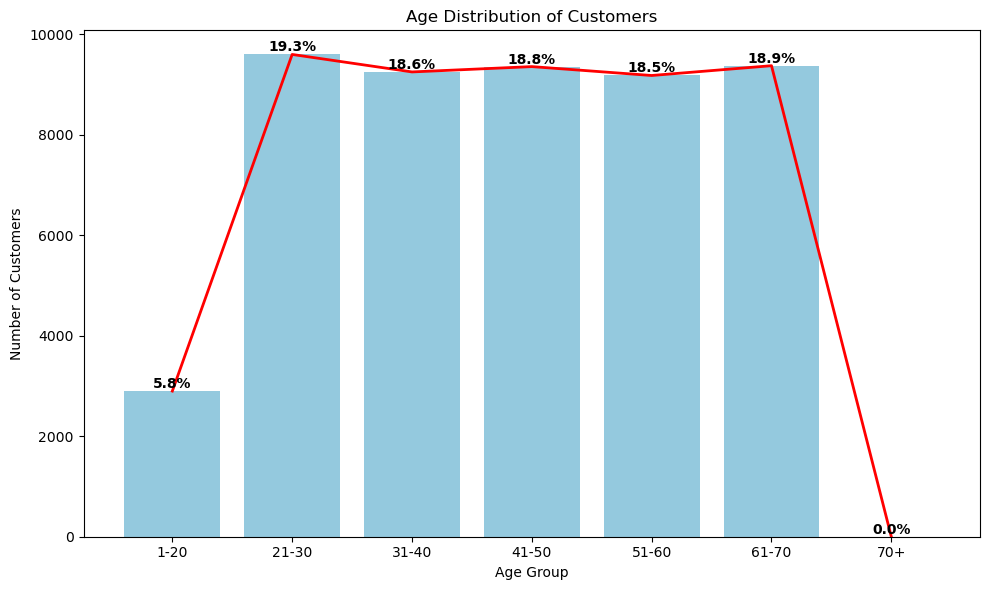

In [37]:
# Plotting the number of customers in each age group

age_counts = customer_master_data['Age Group'].value_counts().reindex(labels)
age_percent = (age_counts / age_counts.sum()) * 100

# Plot barplot

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=age_counts.values, color='skyblue')

# Add line connecting tops of bars

plt.plot(range(len(labels)), age_counts.values, color='red', marker='', linestyle='-', linewidth=2)

# Add percentage labels on top of bars

for i, (count, pct) in enumerate(zip(age_counts.values, age_percent.values)):
    plt.text(i, count + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Final plot styling

plt.title('Age Distribution of Customers')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.tight_layout()

#Save plots

plt.savefig('age distribution.png', dpi=300, bbox_inches='tight')  # PNG file
plt.savefig('age distribution.pdf', bbox_inches='tight')          # PDF file (optional)

#Show plot

plt.show()

/var/folders/rp/kr_rbvk16qd66ybh36wsvyhr0000gn/T/ipykernel_12983/1245008327.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/rp/kr_rbvk16qd66ybh36wsvyhr0000gn/T/ipykernel_12983/1245008327.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



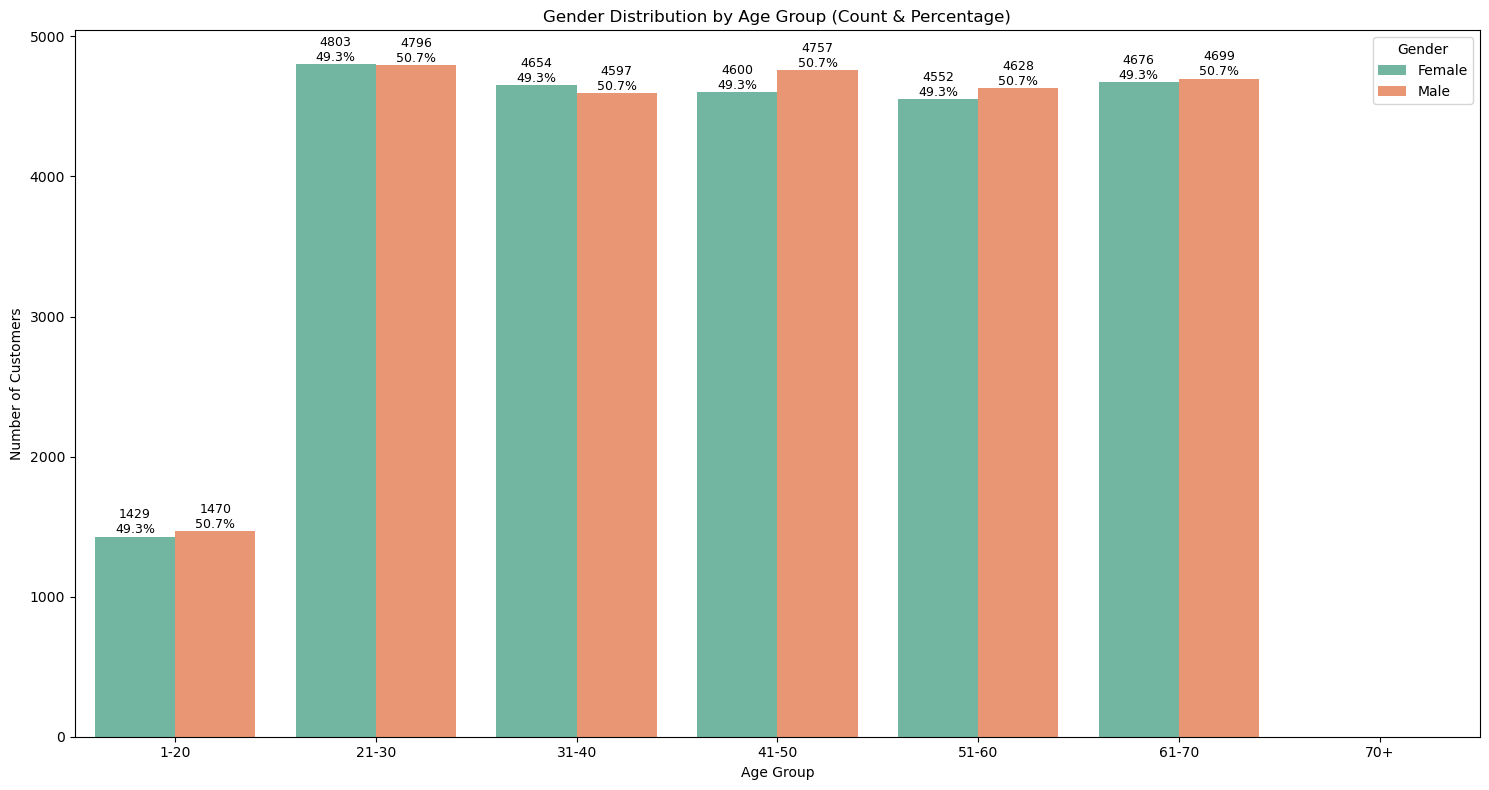

In [38]:
# Plotting the number of customers in each age group by gender

grouped = customer_master_data.groupby(['Age Group', 'gender']).size().reset_index(name='count')

# Calculate percentage within each Age Group

grouped['percent'] = grouped.groupby('Age Group')['count'].transform(lambda x: (x / x.sum()) * 100)

# Plot

plt.figure(figsize=(15, 8))
barplot = sns.barplot(data=grouped, x='Age Group', y='count', hue='gender', palette='Set2')

# Step 6: Add count and percentage labels
# barplot.containers gives list of all bars, in the order of the grouped data

for container, (_, row) in zip(barplot.containers, grouped.iterrows()):
    for bar in container:
        height = bar.get_height()
        if height > 0:  # only annotate if there is a bar
            plt.text(
                bar.get_x() + bar.get_width() / 2,
                height + 1,
                f"{int(height)}\n{row['percent']:.1f}%",
                ha='center',
                va='bottom',
                fontsize=9
            )

# Final styling

plt.title('Gender Distribution by Age Group (Count & Percentage)')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Gender')
plt.tight_layout()

# Save plots

plt.savefig('age distribution by gender.png', dpi=300, bbox_inches='tight')  # PNG file
plt.savefig('age distribution by gender.pdf', bbox_inches='tight') 

# Show plot

plt.show()

In [39]:
# Total churns, total purchase amount, total order and average order value by age group
# Now that we know the minimum age is 18 and maximum age is 70. We can distribute the customers in a range of 18-70.
# To take a more generalised approach we can create different bins.

age_group_data = customer_master_data.groupby('Age Group'). agg(
    total_purchase_by_age = ('total_purchase_amount','sum'),
    average_purchase_by_age = ('total_purchase_amount','mean'),
    total_churns_by_age = ('churn','sum'),
    total_returns_by_age = ('total_returns','sum')
    )

age_group_data['average_purchase_by_age'] = round(age_group_data['average_purchase_by_age'],2)

age_group_data

/var/folders/rp/kr_rbvk16qd66ybh36wsvyhr0000gn/T/ipykernel_12983/3739944777.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



total_purchase_by_age  average_purchase_by_age  \
Age Group                                                   
1-20                    37843997                 13054.16   
21-30                  127334699                 13265.41   
31-40                  125214448                 13535.23   
41-50                  128224580                 13703.60   
51-60                  129154045                 14069.07   
61-70                  133574530                 14247.95   
70+                            0                      NaN   

           total_churns_by_age  total_returns_by_age  
Age Group                                             
1-20                       597                  5932  
21-30                     1950                 19757  
31-40                     1812                 18930  
41-50                     1860                 19045  
51-60                     1793                 18688  
61-70                     1917                 19124  
70+                          0                     0

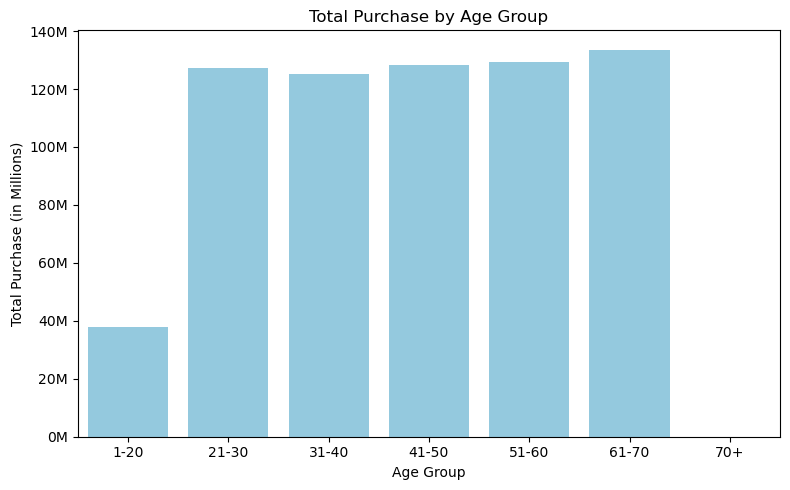

In [40]:
# Total purcahse by age group

from matplotlib.ticker import FuncFormatter # We would be using this to show the y-axis in millions

plt.figure(figsize=(8, 5))
sns.barplot(data=age_group_data, x='Age Group', y='total_purchase_by_age', color='skyblue')

# Format Y-axis in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 1e-6:.0f}M'))

# Label and title
plt.title('Total Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase (in Millions)')
plt.tight_layout()

# Save plots
plt.savefig('total purcahse by age group.png', dpi=300, bbox_inches='tight')  # PNG file
plt.savefig('total purcahse by age group.pdf', bbox_inches='tight')

# Show plot

plt.show()

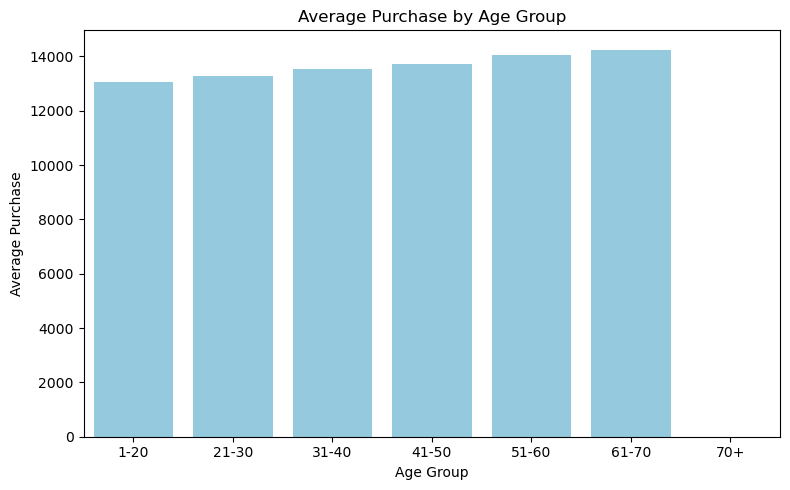

In [41]:
# Average purcahse by age group

from matplotlib.ticker import FuncFormatter # We would be using this to show the y-axis in millions

plt.figure(figsize=(8, 5))
sns.barplot(data=age_group_data, x='Age Group', y='average_purchase_by_age', color='skyblue')

# Label and title

plt.title('Average Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase')
plt.tight_layout()

# Save plots

plt.savefig('average purcahse by age group.png', dpi=300, bbox_inches='tight')  # PNG file
plt.savefig('average purcahse by age group.pdf', bbox_inches='tight')

# Show plot

plt.show()

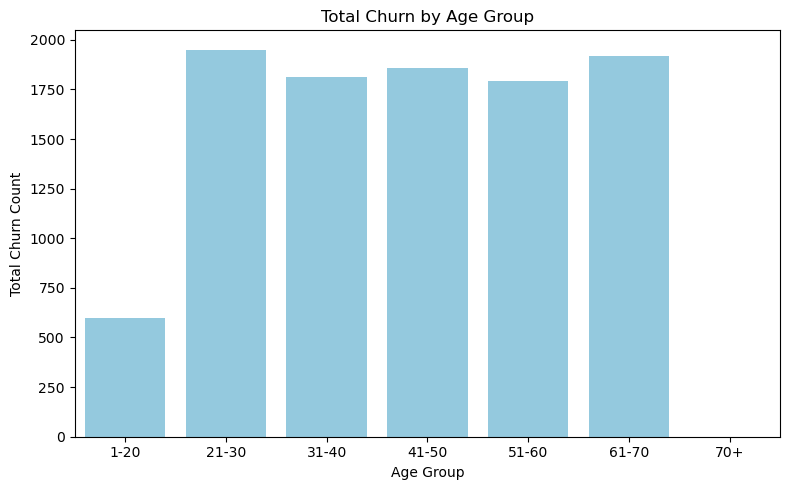

In [42]:
# Total churn by age group

plt.figure(figsize=(8, 5))
sns.barplot(data=age_group_data, x='Age Group', y='total_churns_by_age', color='skyblue')

# Label and title

plt.title('Total Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Churn Count')
plt.tight_layout()

# Save plots

plt.savefig('total_churns_by_age by age group.png', dpi=300, bbox_inches='tight')  # PNG file
plt.savefig('total_churns_by_age by age group.pdf', bbox_inches='tight')

# Show plot

plt.show()

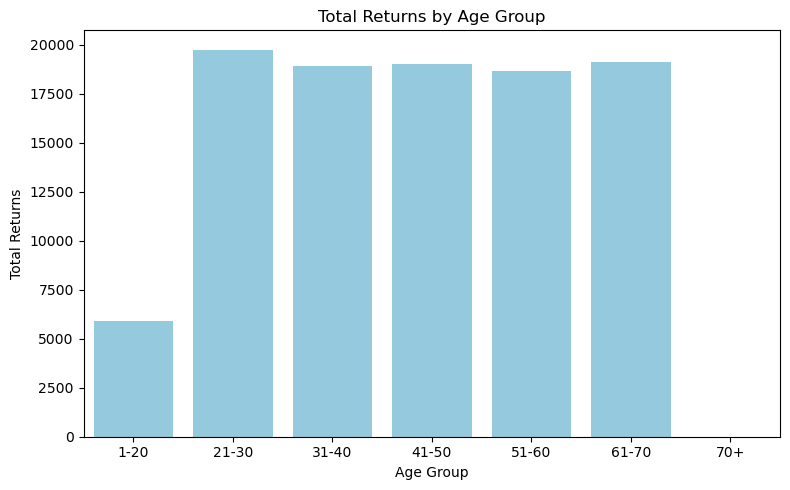

In [43]:
# Total returns by age group

plt.figure(figsize=(8, 5))
sns.barplot(data=age_group_data, x='Age Group', y='total_returns_by_age', color='skyblue')

# Label and title

plt.title('Total Returns by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Returns')
plt.tight_layout()

# Save plots

plt.savefig('total_returns_by_age by age group.png', dpi=300, bbox_inches='tight')  # PNG file
plt.savefig('total_returns_by_age by age group.pdf', bbox_inches='tight')

# Show plot

plt.show()

By looking at the data from age group distribution, following points can be made.

1. The distribution of customers in each age group is nearly same. Meaning near equal number of customers are available in each age group.
2. Customer count in age group 0-20 is smaller than other groups. It is justifiable as the minimum age is 18year. As such the age group 0-20 is the representation of customers from 18 to 20years age.
3. The distribution of male and female customers is also near equal within each age group.
4. There appear no significant difference in total purchase, average purchase, total churn and total return among age groups.

### Payment Analysis

In [46]:
# Overall payment mode distribution

overall_payment_mode = clean_data.groupby('Payment Method').size().reset_index()
overall_payment_mode = overall_payment_mode.rename(columns = {0: 'Total Counts'})
overall_payment_mode['% Payments'] = round((overall_payment_mode['Total Counts']/overall_payment_mode['Total Counts'].sum()) * 100, 2)

overall_payment_mode

Payment Method  Total Counts  % Payments
0           Cash         83012       33.20
1    Credit Card         83547       33.42
2         PayPal         83441       33.38

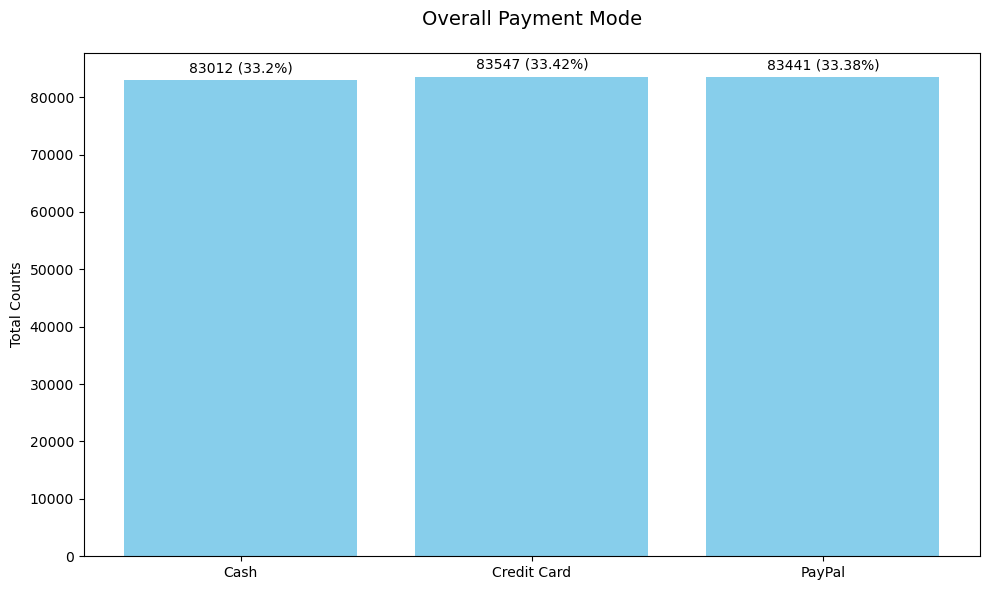

In [47]:
# Let#s first see the overall distribution for preference to Payment Method by number of Transactions

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(overall_payment_mode['Payment Method'], overall_payment_mode['Total Counts'], color='skyblue')

# Add labels on top of each bar
for bar, count, pct in zip(bars, overall_payment_mode['Total Counts'], overall_payment_mode['% Payments']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2,
            height + max(overall_payment_mode['Total Counts']) * 0.01,  # slight space above
            f'{count} ({pct}%)',
            ha='center', va='bottom', fontsize=10)

# Titles and labels
ax.set_title('Overall Payment Mode', fontsize=14, pad=20)
ax.set_ylabel('Total Counts')
ax.set_xlabel('')
plt.xticks(rotation=0)

# Tidy layout
plt.tight_layout()

# Save 
plt.savefig('Overall Payment Mode Distribution.png', dpi=300)
plt.savefig('Overall Payment Mode Distribution.pdf', bbox_inches='tight')

plt.show()

In [48]:
# Overall payment preferences by gender

overall_payment_mode_gender = clean_data.groupby(['Payment Method', 'Gender']).size().reset_index()
overall_payment_mode_gender = overall_payment_mode_gender.rename(columns={0: 'Total Counts'})
overall_payment_mode_gender['% Payments'] = round((overall_payment_mode_gender['Total Counts']/overall_payment_mode_gender['Total Counts'].sum()) * 100, 2)

overall_payment_mode_gender

Payment Method  Gender  Total Counts  % Payments
0           Cash  Female         41308       16.52
1           Cash    Male         41704       16.68
2    Credit Card  Female         41609       16.64
3    Credit Card    Male         41938       16.78
4         PayPal  Female         41407       16.56
5         PayPal    Male         42034       16.81

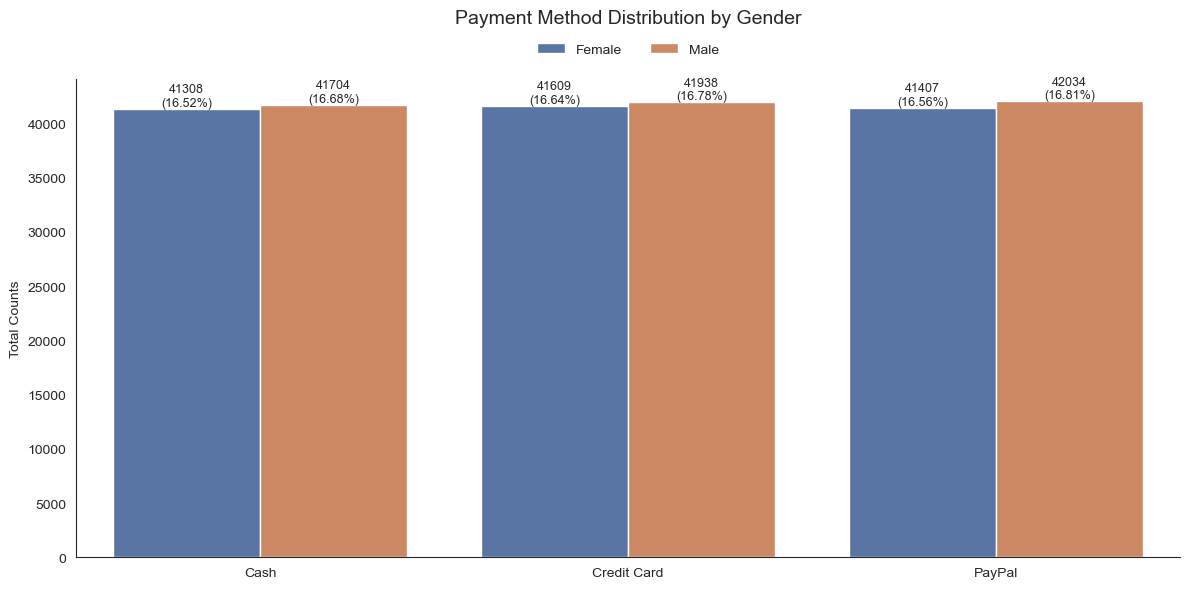

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style without grid

sns.set_style('white')  # no grid

# Create plot

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=overall_payment_mode_gender,
    x='Payment Method',
    y='Total Counts',
    hue='Gender',
    palette='deep'
)

# Add count and percentage labels on bars

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            # Get bar center
            x = bar.get_x() + bar.get_width() / 2
            # Get values from dataframe for label
            method = bar.get_label()
            gender = bar.get_label()
            count = int(round(height))
            # Match count and % from dataframe
            for i in range(len(overall_payment_mode_gender)):
                if abs(overall_payment_mode_gender.loc[i, 'Total Counts'] - count) < 0.001:
                    pct = overall_payment_mode_gender.loc[i, '% Payments']
                    break
            else:
                pct = 0
            label = f"{count}\n({pct}%)"
            ax.text(x, height + 1, label, ha='center', va='bottom', fontsize=9)

# Customize plot

plt.title('Payment Method Distribution by Gender', fontsize=14, pad=40)
plt.ylabel('Total Counts')
plt.xlabel('')  # No x-axis label
ax.xaxis.label.set_visible(False)  # ensures x-axis label is hidden
plt.xticks(rotation=0)  # No rotation
sns.despine()  # remove top and right spines

# Legend outside top center

plt.legend(loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    frameon=False,
    ncol=2)

# Tidy layout

plt.tight_layout()

# Save 

plt.savefig('Payment Method Distribution by Gender.png', dpi=300)
plt.savefig('Payment Method Distribution by Gender.pdf', bbox_inches='tight')

# Show Plot

plt.show()

In [50]:
# Payment mode and total revenue generation

overall_payment_transactions = clean_data.groupby('Payment Method').agg(
    total_revenue = ('Total Purchase Amount', 'sum'),
).reset_index()
overall_payment_transactions['perc_revenue'] = round((overall_payment_transactions['total_revenue']/overall_payment_transactions['total_revenue'].sum())*100,2)

overall_payment_transactions

Payment Method  total_revenue  perc_revenue
0           Cash      225423854         33.09
1    Credit Card      228822915         33.58
2         PayPal      227099530         33.33

/var/folders/rp/kr_rbvk16qd66ybh36wsvyhr0000gn/T/ipykernel_12983/1347296155.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




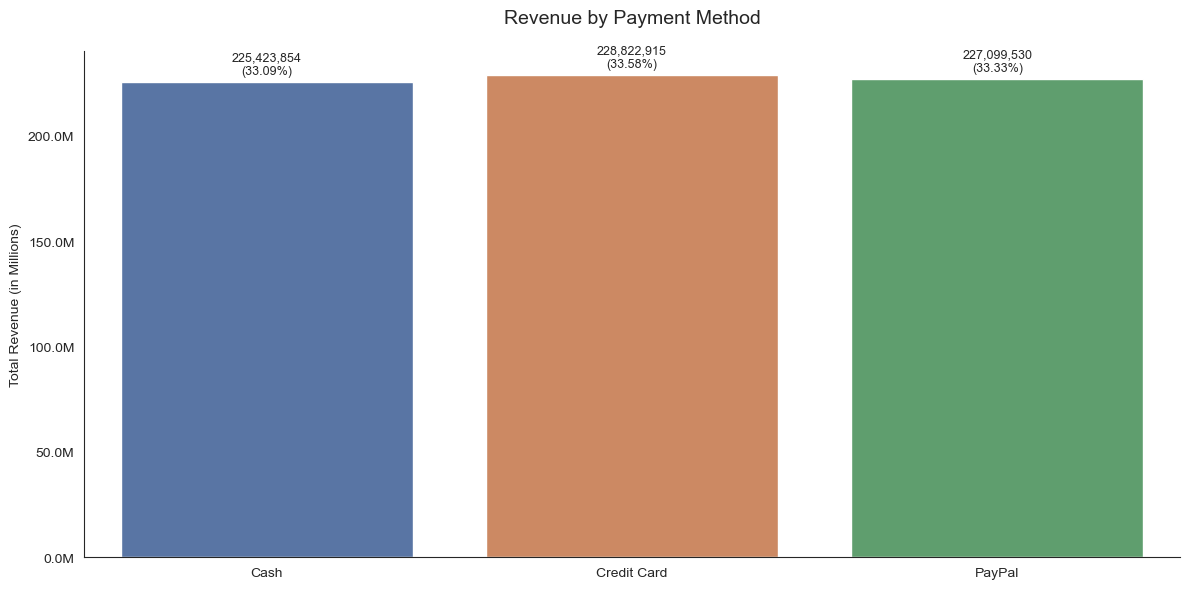

<Figure size 640x480 with 0 Axes>

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Set seaborn style

sns.set_style('white')

# Create the plot

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=overall_payment_transactions,
    x='Payment Method',
    y='total_revenue',
    palette='deep'
)

# Format y-axis to show in millions

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

# Add labels: total revenue + percentage

for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    total = overall_payment_transactions.loc[i, 'total_revenue']
    pct = overall_payment_transactions.loc[i, 'perc_revenue']
    label = f"{int(total):,}\n({pct}%)"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + max(overall_payment_transactions['total_revenue']) * 0.01,
        label,
        ha='center',
        va='bottom',
        fontsize=9
    )

# Customize plot

plt.title('Revenue by Payment Method', fontsize=14, pad=20)
plt.ylabel('Total Revenue (in Millions)')
plt.xlabel('')
plt.xticks(rotation=0)
sns.despine()
plt.tight_layout()
plt.show()

# Save 

plt.savefig('Payment Method Distribution by Total Revenue.png', dpi=300)
plt.savefig('Payment Method Distribution by Total Revenue.pdf', bbox_inches='tight')

# Show Plot

plt.show()

In [52]:
# Payment mode and age group

age_group_payment = customer_master_data.groupby('Age Group').agg(
    card=('count_card_payment', 'sum'),
    paypal = ('count_paypal_payment', 'sum'),
    cash = ('count_cash_payment', 'sum')
).reset_index()

age_group_payment

/var/folders/rp/kr_rbvk16qd66ybh36wsvyhr0000gn/T/ipykernel_12983/130817644.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Age Group   card  paypal   cash
0      1-20   4871    4902   4860
1     21-30  16055   16345  15980
2     31-40  15616   15616  15579
3     41-50  15668   15652  15595
4     51-60  15517   15379  15351
5     61-70  15820   15547  15647
6       70+      0       0      0

/var/folders/rp/kr_rbvk16qd66ybh36wsvyhr0000gn/T/ipykernel_12983/1961393834.py:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



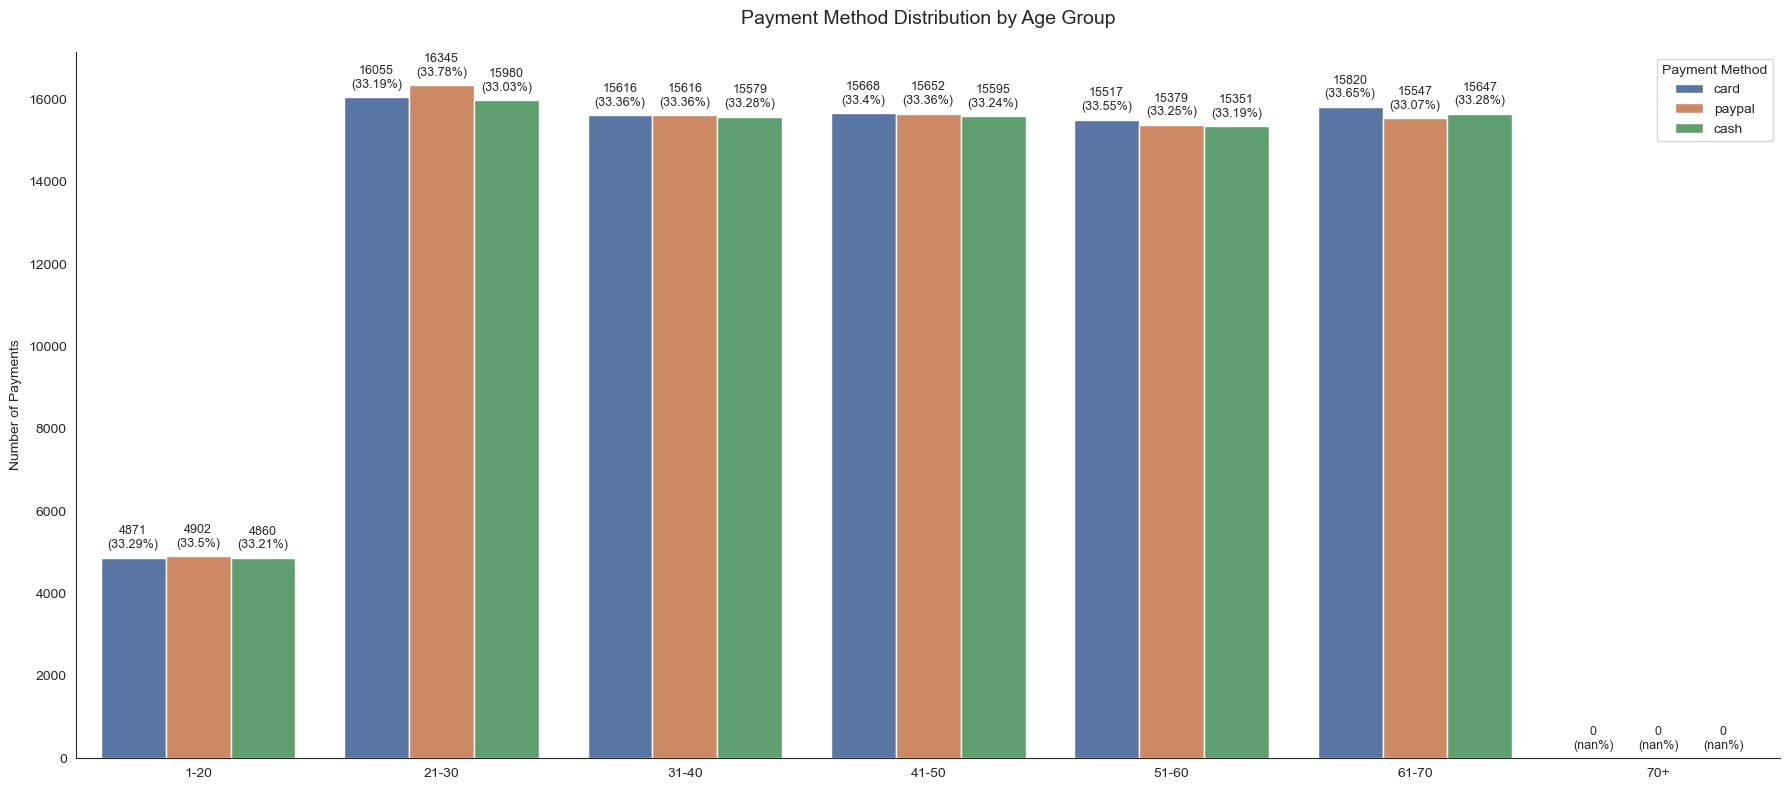

In [53]:
# Melt to long format for seaborn plotting

payment_by_age_melted = age_group_payment.melt(id_vars='Age Group', 
                                             value_vars=['card', 'paypal', 'cash'], 
                                             var_name='Payment Method', 
                                             value_name='Count')

# Calculate total and percentage

payment_by_age_melted['Total in Age Group'] = payment_by_age_melted.groupby('Age Group')['Count'].transform('sum')
payment_by_age_melted['%'] = round((payment_by_age_melted['Count'] / payment_by_age_melted['Total in Age Group']) * 100, 2)

# Plot

plt.figure(figsize=(18, 8))
sns.set_style('white')
ax = sns.barplot(
    data=payment_by_age_melted,
    x='Age Group',
    y='Count',
    hue='Payment Method',
    palette='deep'
)

# Add labels on each bar: count + %

for bar, count, pct in zip(ax.patches, 
                           payment_by_age_melted['Count'], 
                           payment_by_age_melted['%']):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + payment_by_age_melted['Count'].max() * 0.01,
        f"{int(count)}\n({pct}%)",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Clean up plot

plt.title('Payment Method Distribution by Age Group', fontsize=14, pad=20)
plt.ylabel('Number of Payments')
plt.xlabel('')
plt.legend(title='Payment Method', loc='upper right')
plt.xticks(rotation=0)
sns.despine()
plt.tight_layout()

# Save 

plt.savefig('Payment Method Distribution by Age Group.png', dpi=300)
plt.savefig('Payment Method Distribution by Age Group.pdf', bbox_inches='tight')

# Show Plot

plt.show()

In [54]:
# Payment mode and year

payment_by_year = clean_data.groupby(['Year', 'Payment Method']).size().reset_index()
payment_by_year = payment_by_year.rename(columns = {0: 'Counts'})
payment_by_year['Year Total'] = payment_by_year.groupby('Year')['Counts'].transform('sum')
payment_by_year['%'] = round((payment_by_year['Counts'] / payment_by_year['Year Total']) * 100, 2)

payment_by_year

Year Payment Method  Counts  Year Total      %
0   2020           Cash   22377       67775  33.02
1   2020    Credit Card   22852       67775  33.72
2   2020         PayPal   22546       67775  33.27
3   2021           Cash   22513       67403  33.40
4   2021    Credit Card   22456       67403  33.32
5   2021         PayPal   22434       67403  33.28
6   2022           Cash   22625       67585  33.48
7   2022    Credit Card   22365       67585  33.09
8   2022         PayPal   22595       67585  33.43
9   2023           Cash   15497       47237  32.81
10  2023    Credit Card   15874       47237  33.61
11  2023         PayPal   15866       47237  33.59

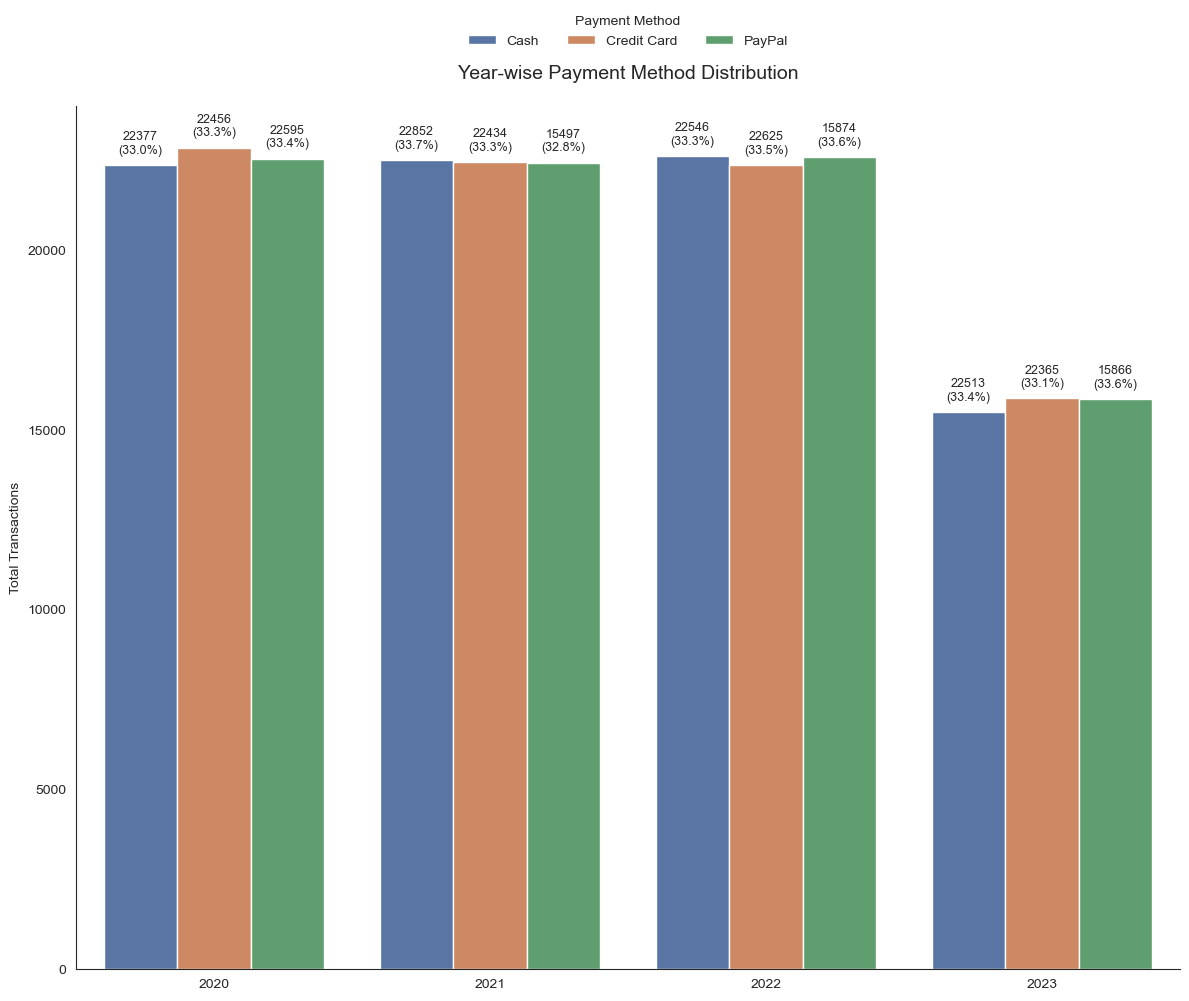

In [55]:
plt.figure(figsize=(12, 10))
sns.set_style('white')

ax = sns.barplot(
    data=payment_by_year,
    x='Year',
    y='Counts',
    hue='Payment Method',
    palette='deep'
)

# Add labels (Count + %)
for bar, (_, row) in zip(ax.patches, payment_by_year.iterrows()):
    height = bar.get_height()
    count = row['Counts']
    pct = row['%']
    # If pct is fraction like 0.123, convert to percent with 1 decimal place:
    if pct <= 1:
        pct_str = f"{pct*100:.1f}"
    else:
        pct_str = f"{pct:.1f}"
    label = f"{count}\n({pct_str}%)"
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + payment_by_year['Counts'].max() * 0.01,
        label,
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Year-wise Payment Method Distribution', fontsize=14, pad=20)

plt.legend(
    title='Payment Method',
    loc='upper center',
    bbox_to_anchor=(0.5, 1.12),
    ncol=len(payment_by_year['Payment Method'].unique()),
    frameon=False
)

plt.xlabel('')
plt.ylabel('Total Transactions')
plt.xticks(rotation=0)
sns.despine()
plt.tight_layout()

plt.show()

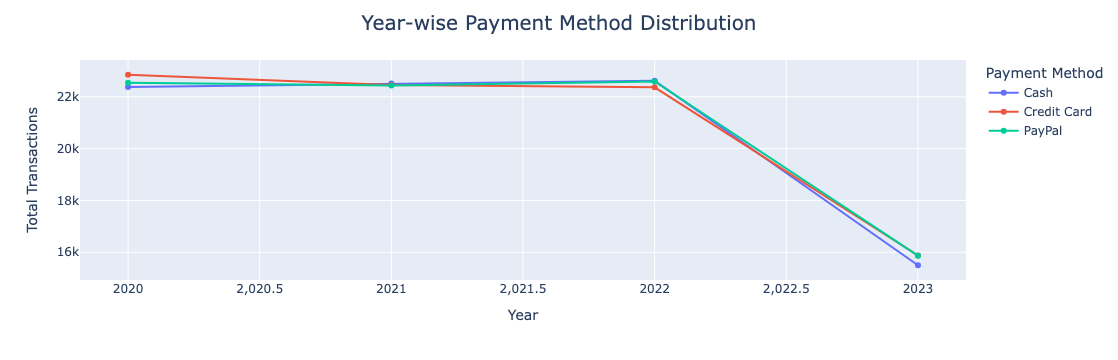

<Figure size 640x480 with 0 Axes>

In [56]:
import plotly.express as px

fig = px.line(payment_by_year, x = "Year", y = "Counts", color = 'Payment Method', markers = True)

# Edit the layout
fig.update_layout(
        title = dict(
            text = 'Year-wise Payment Method Distribution', 
            x=0.5,  # Center the title
            xanchor='center',  # Ensure anchoring is from the center
            font=dict(size=20)  # Optional: adjust font size
        ),
        xaxis = dict(
            title = dict(
                text = 'Year'
            )
        ),
        yaxis = dict(
            title = dict(
                text = 'Total Transactions'
            )
        ),
)

# Save 
plt.savefig('Year-wise Payment Method Distribution Lineplot.png', dpi=300)
plt.savefig('Year-wise Payment Method Distribution Lineplot.pdf', bbox_inches='tight')

fig.show()

1. The payment mode analysis show no overall differences among the mode of payments i.e. Credit Card, Cash or PayPal.  
2. All three modes of payment share near equal preference when analysed for Total Transactions, Total Reveneue, Gender Preference, Age Group and Year-wise Transactions.  
3. It is surprising to note that there is no change in total transactions and total revenue generation among different payment methods during Covid-19 hit years (2020 - 2022). One would expect an increase in cashless mode of payments such as Credit Card or PayPal but the current analysis dis not support the idea.

### Annual Summaries

In [59]:
annual_summary_data = clean_data.groupby('Year').agg(
    total_revenue = ('Total Purchase Amount', 'sum'),
    customer_count = ('Customer ID', pd.Series.nunique),
    total_orders_male = ('Gender', lambda x: (x == 'Male').sum()),
    total_orders_female = ('Gender', lambda x: (x == 'Female').sum()),
    total_orders = ('Customer ID', 'count'),
    total_returns = ('Returns', 'sum')
).reset_index()

annual_summary_data['yoy_revenue_growth_%'] = annual_summary_data['total_revenue'].pct_change().round(3) * 100
annual_summary_data

Year  total_revenue  customer_count  total_orders_male  \
0  2020      184877504           37010              34169   
1  2021      183672481           37157              33609   
2  2022      184344727           37053              33970   
3  2023      128451587           30551              23928   

   total_orders_female  total_orders  total_returns  yoy_revenue_growth_%  
0                33606         67775          27605                   NaN  
1                33794         67403          27184                  -0.7  
2                33615         67585          27520                   0.4  
3                23309         47237          19167                 -30.3

In [60]:
# Churn calculation
# It is important to note that each customer is represented by multiple rows. So, a customer who has churned but completed several orders before churning would be represented multiple times.
# In this case, we need to count a customer only once.

churned_data = clean_data[clean_data['Churn'] == 1]
first_churn_year = churned_data.groupby('Customer ID')['Year'].min().reset_index()
churns_per_year = first_churn_year.groupby('Year')['Customer ID'].nunique().reset_index(name = 'total_churns')

# Merge accurate churn into summary
annual_summary_data = annual_summary_data.merge(churns_per_year, on = 'Year', how = 'left')
annual_summary_data['total_churns'] = annual_summary_data['total_churns'].fillna(0).astype(int)

annual_summary_data

Year  total_revenue  customer_count  total_orders_male  \
0  2020      184877504           37010              34169   
1  2021      183672481           37157              33609   
2  2022      184344727           37053              33970   
3  2023      128451587           30551              23928   

   total_orders_female  total_orders  total_returns  yoy_revenue_growth_%  \
0                33606         67775          27605                   NaN   
1                33794         67403          27184                  -0.7   
2                33615         67585          27520                   0.4   
3                23309         47237          19167                 -30.3   

   total_churns  
0          7428  
1          1922  
2           489  
3            90

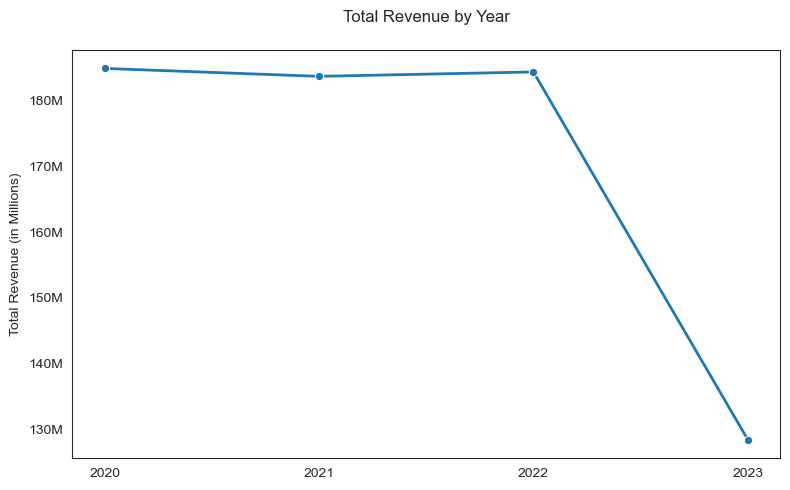

In [61]:
# Revenue over years
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format y-axis in millions
def millions(x, pos):
    return f'{x * 1e-6:.0f}M'

plt.figure(figsize=(8, 5))

# Line plot
sns.lineplot(data=annual_summary_data, x='Year', y='total_revenue', marker='o', linewidth=2)

# Fix y-axis to show in millions
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

# Fix x-axis: remove decimal ticks and format labels
plt.xticks(
    ticks=annual_summary_data['Year'],
    labels=annual_summary_data['Year'].astype(int),
    rotation=0
)

# Remove x-axis label
plt.xlabel('')

# Title and Y-label
plt.title('Total Revenue by Year', pad=20)
plt.ylabel('Total Revenue (in Millions)')

plt.tight_layout()
plt.savefig('lineplot_revenue_years.png', dpi=300, bbox_inches='tight')
plt.savefig('lineplot_revenue_years.pdf', bbox_inches='tight')
plt.show()

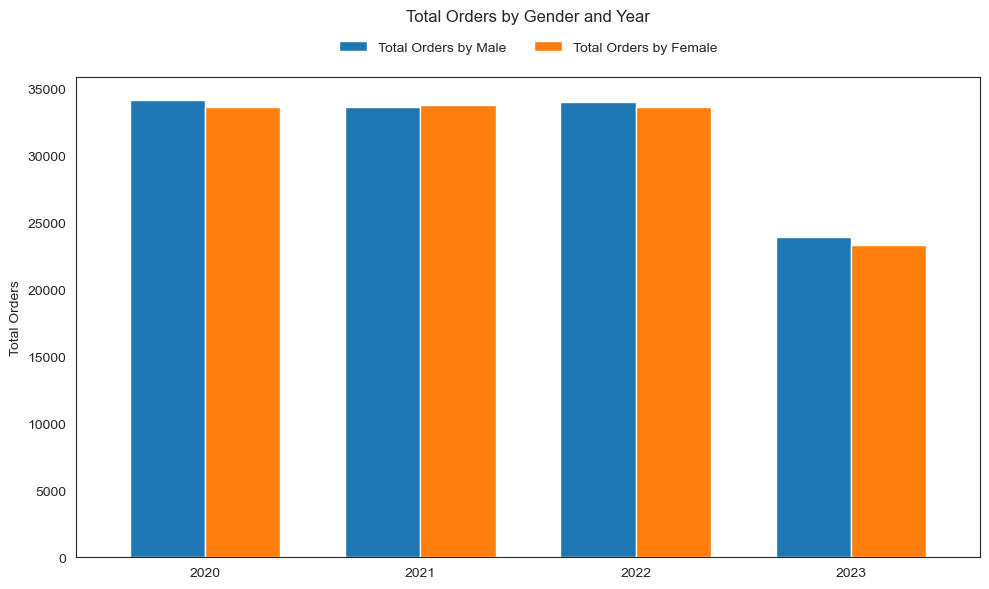

In [62]:
# Total orders by gender breakdown
import matplotlib.pyplot as plt

# Plot side-by-side bars
ax = annual_summary_data[['Year', 'total_orders_male', 'total_orders_female']]\
    .set_index('Year')\
    .rename(columns={
        'total_orders_male': 'Total Orders by Male',
        'total_orders_female': 'Total Orders by Female'
    })\
    .plot(kind='bar', figsize=(10, 6), width=0.7)

plt.xticks(rotation=0)

# Title and labels
plt.title('Total Orders by Gender and Year', pad=40)
plt.xlabel('')
plt.ylabel('Total Orders')

# Legend outside top right
plt.legend(loc='upper center',
    bbox_to_anchor=(0.5, 1.1),  # push legend fully outside top right
    frameon=False,
    ncol=2) 

# Tidy layout to prevent clipping
plt.tight_layout()

# Save plot
plt.savefig('total_orders_by_gender.png', dpi=300, bbox_inches='tight')
plt.savefig('total_orders_by_gender.pdf', bbox_inches='tight')

plt.show()

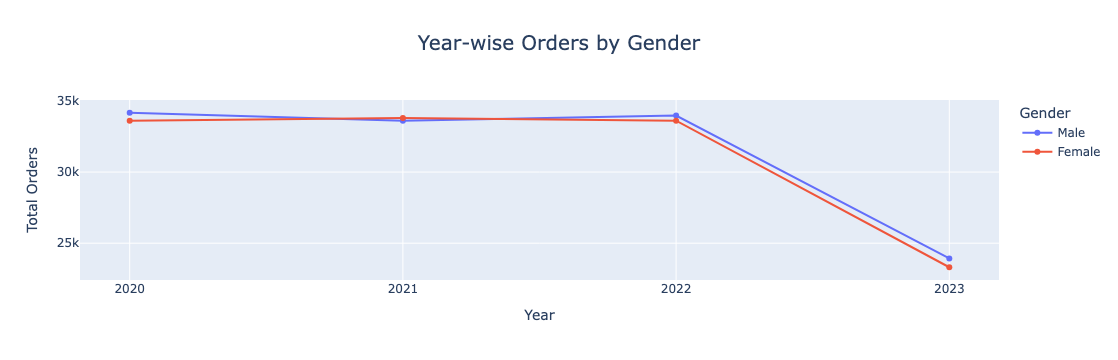

<Figure size 640x480 with 0 Axes>

In [63]:
import plotly.graph_objects as go

fig = go.Figure()

# Add data for male
fig.add_trace(go.Scatter(
    x = annual_summary_data['Year'].astype(str),
    y = annual_summary_data['total_orders_male'],
    mode = 'lines+markers',
    name = 'Male'
))

# Add data for female
fig.add_trace(go.Scatter(
    x = annual_summary_data['Year'].astype(str),
    y = annual_summary_data['total_orders_female'],
    mode = 'lines+markers',
    name = 'Female'
))

# Update layout
fig.update_layout(
    title = dict(
        text = 'Year-wise Orders by Gender',
        x = 0.5,
        xanchor = 'center',
        font = dict(size = 20)
    ),
    xaxis = dict(
        title = dict(text = 'Year')
    ),
    yaxis = dict(
        title = dict(text = 'Total Orders')
    ),
    legend_title_text = 'Gender'
)

# Save plot

plt.savefig('total_orders_by_gender_line_plot.png', dpi=300, bbox_inches='tight')
plt.savefig('total_orders_by_gender_line_plot.pdf', bbox_inches='tight')

# Show Plot
fig.show()


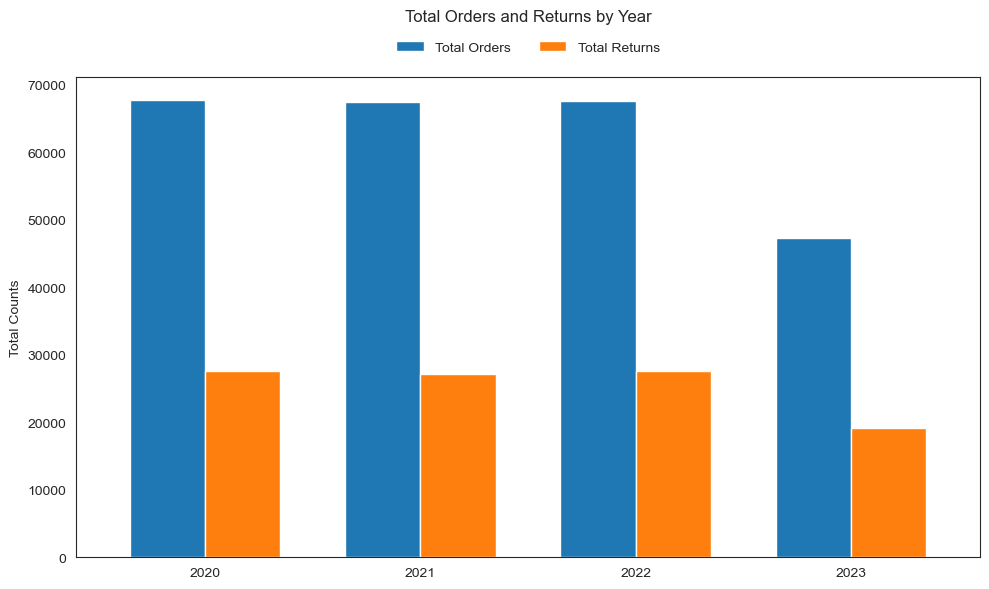

In [64]:
# Total orders and returns
import matplotlib.pyplot as plt

# Plot side-by-side bars
ax = annual_summary_data[['Year', 'total_orders', 'total_returns']]\
    .set_index('Year')\
    .rename(columns = {
        'total_orders': 'Total Orders',
        'total_returns': 'Total Returns'
    })\
    .plot(kind = 'bar', figsize = (10, 6), width=0.7)

plt.xticks(rotation = 0)

# Title and labels
plt.title('Total Orders and Returns by Year', pad = 40)
plt.xlabel('')
plt.ylabel('Total Counts')

# Legend outside top right
plt.legend(loc = 'upper center',
    bbox_to_anchor = (0.5, 1.1),  # push legend fully outside top right
    frameon = False,
    ncol = 2) 

# Tidy layout to prevent clipping
plt.tight_layout()

# Save plot
plt.savefig('Total orders and returns.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('Total orders and returns.pdf', bbox_inches = 'tight')

plt.show()


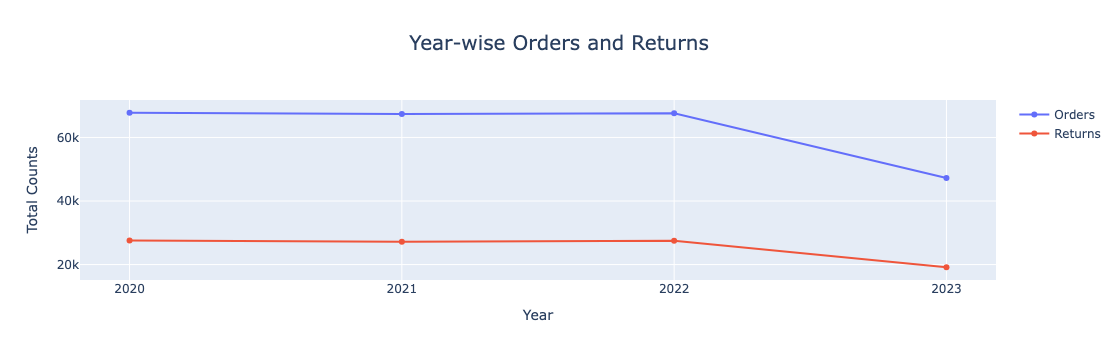

<Figure size 640x480 with 0 Axes>

In [65]:
import plotly.graph_objects as go

fig = go.Figure()

# Add data for male
fig.add_trace(go.Scatter(
    x = annual_summary_data['Year'].astype(str),
    y = annual_summary_data['total_orders'],
    mode = 'lines+markers',
    name = 'Orders'
))

# Add data for female
fig.add_trace(go.Scatter(
    x = annual_summary_data['Year'].astype(str),
    y = annual_summary_data['total_returns'],
    mode = 'lines+markers',
    name = 'Returns'
))

# Update layout
fig.update_layout(
    title = dict(
        text = 'Year-wise Orders and Returns',
        x = 0.5,
        xanchor = 'center',
        font = dict(size = 20)
    ),
    xaxis = dict(
        title = dict(text = 'Year')
    ),
    yaxis = dict(
        title = dict(text = 'Total Counts')
    )#,
    #legend_title_text = 'Gender'
)

# Save plot

plt.savefig('total_orders_and_returns_by_year_line_plot.png', dpi=300, bbox_inches='tight')
plt.savefig('total_orders_and_returns_by_year_line_plot.pdf', bbox_inches='tight')

# Show Plot
fig.show()

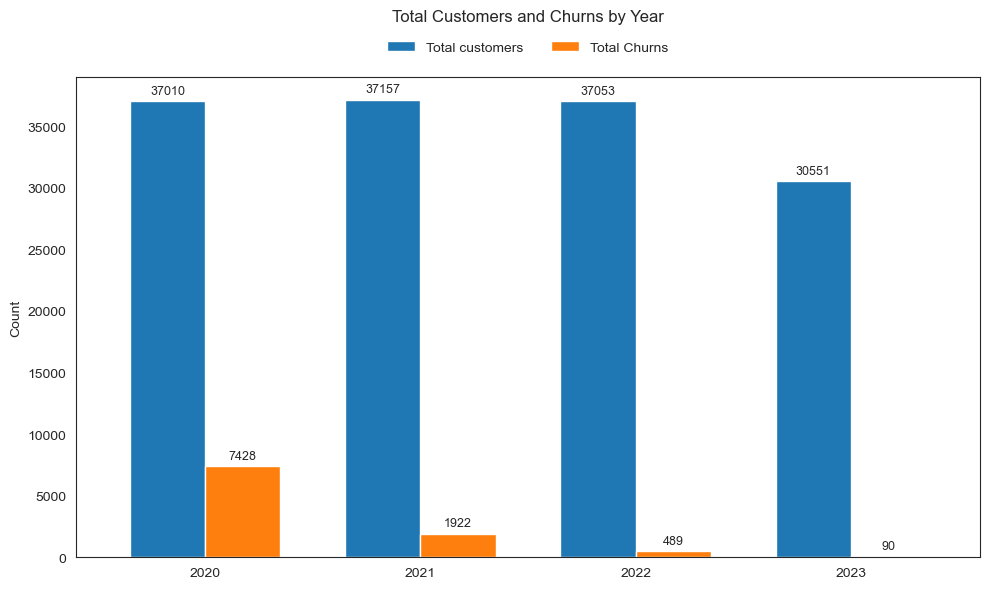

In [66]:
# Plot side-by-side bars
ax = annual_summary_data[['Year', 'customer_count', 'total_churns']]\
    .set_index('Year')\
    .rename(columns={
        'customer_count': 'Total customers',
        'total_churns': 'Total Churns'
    })\
    .plot(kind='bar', figsize=(10, 6), width=0.7)

plt.xticks(rotation=0)

# Title and labels
plt.title('Total Customers and Churns by Year', pad=40)
plt.xlabel('')
plt.ylabel('Count')

# Add value labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3, fontsize=9)

# Legend outside top center
plt.legend(loc='upper center',
    bbox_to_anchor=(0.5, 1.1),
    frameon=False,
    ncol=2)

# Tidy layout to prevent clipping
plt.tight_layout()

# Save plot
plt.savefig('Total Customers and Churns by Year.png', dpi=300, bbox_inches='tight')
plt.savefig('Total Customers and Churns by Year.pdf', bbox_inches='tight')

plt.show()


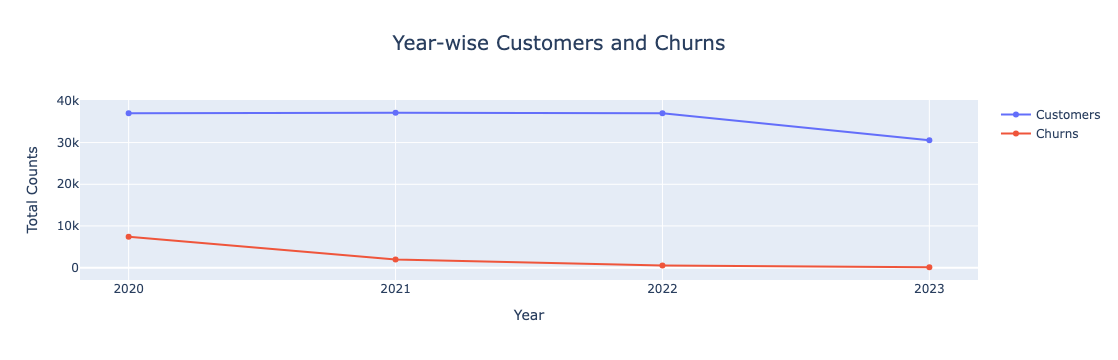

<Figure size 640x480 with 0 Axes>

In [67]:
import plotly.graph_objects as go

fig = go.Figure()

# Add data for male
fig.add_trace(go.Scatter(
    x = annual_summary_data['Year'].astype(str),
    y = annual_summary_data['customer_count'],
    mode = 'lines+markers',
    name = 'Customers'
))

# Add data for female
fig.add_trace(go.Scatter(
    x = annual_summary_data['Year'].astype(str),
    y = annual_summary_data['total_churns'],
    mode = 'lines+markers',
    name = 'Churns'
))

# Update layout
fig.update_layout(
    title = dict(
        text = 'Year-wise Customers and Churns',
        x = 0.5,
        xanchor = 'center',
        font = dict(size = 20)
    ),
    xaxis = dict(
        title = dict(text = 'Year')
    ),
    yaxis = dict(
        title = dict(text = 'Total Counts')
    )#,
    #legend_title_text = 'Gender'
)

# Save plot

plt.savefig('total_customers_and_churns_by_year_line_plot.png', dpi=300, bbox_inches='tight')
plt.savefig('total_customers_and_churns_by_year_line_plot.pdf', bbox_inches='tight')

# Show Plot
fig.show()

As we notice, the total revenue, total orders, total return, total customers does not change over the years.  
Interestingly, total churns are decreasing over the years. Also, the yoy %growth fell down by almost 30% in the year 2023.  
*Note*: It is important to note that only three quarters i.e until September 2023 infomration was available. The lack of information about the fourth quarter can explain the 30% reduction in yoy growth.

### Churn Analysis

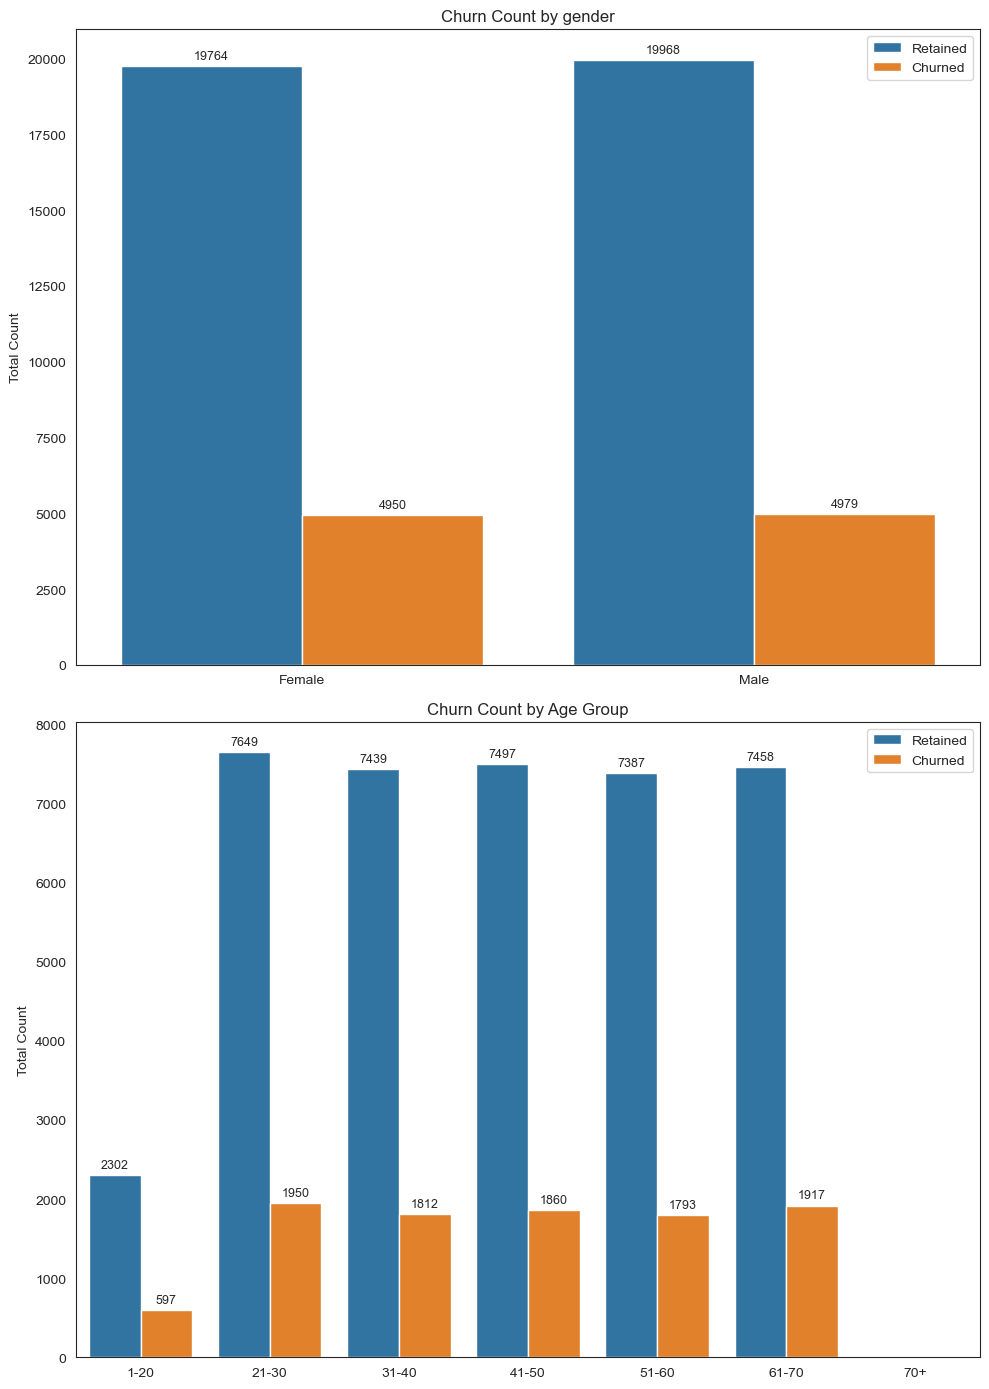

In [122]:
# Churns

# Set up the environment
plt.figure(figsize = (10,14))

# Create list of feature for creating multiple plots
important_features = ['gender', 'Age Group']

# Create for loop to draw multiple plots
for i, col in enumerate(important_features,1):
    ax = plt.subplot(len(important_features),1,i)
    sns.countplot(data = customer_master_data, x = col, hue = 'churn')
    ax.legend(labels=['Retained', 'Churned'], title = None)
    plt.title(f'Churn Count by {col}')
    plt.xlabel('')
    plt.ylabel('Total Count')
    plt.xticks(rotation = 0)
    plt.tight_layout()

    # Add labels
    for container in ax.containers:
        ax.bar_label(container, label_type = 'edge', fontsize = 9, padding = 3)

    # Save plots
    filename_base = f'Total Churn_by_{col.replace(" ", "_")}'
    plt.savefig(f'{filename_base}.png', dpi=300)
    plt.savefig(f'{filename_base}.pdf', bbox_inches='tight')
   
    
plt.show()

### Sales Analysis

In [125]:
# Create a master data for product and associated sales

product_master_data = clean_data.groupby('Product Category').agg(
total_orders = ('Product Category', 'size'),    
total_quantity_purchased = ('Quantity', 'sum'),
total_returns = ('Returns', 'sum'),
max_product_price = ('Product Price', 'max'),
min_product_price = ('Product Price', 'min'),
total_revenue = ('Total Purchase Amount', 'sum'),
average_revenue = ('Total Purchase Amount', 'mean')
).reset_index()

product_master_data['%_product_return'] = round((product_master_data['total_returns']/product_master_data['total_quantity_purchased']) * 100, 2)
product_master_data['%_revenue_of_total'] = round((product_master_data['total_revenue']/product_master_data['total_revenue'].sum()) * 100, 2)

product_master_data

Product Category  total_orders  total_quantity_purchased  total_returns  \
0            Books         62247                    186608          25406   
1         Clothing         62581                    188688          25302   
2      Electronics         62630                    187861          25448   
3             Home         62542                    188077          25320   

   max_product_price  min_product_price  total_revenue  average_revenue  \
0                500                 10      169345236      2720.536508   
1                500                 10      170716122      2727.922564   
2                500                 10      170146025      2716.685694   
3                500                 10      171138916      2736.383806   

   %_product_return  %_revenue_of_total  
0             13.61               24.85  
1             13.41               25.06  
2             13.55               24.97  
3             13.46               25.12

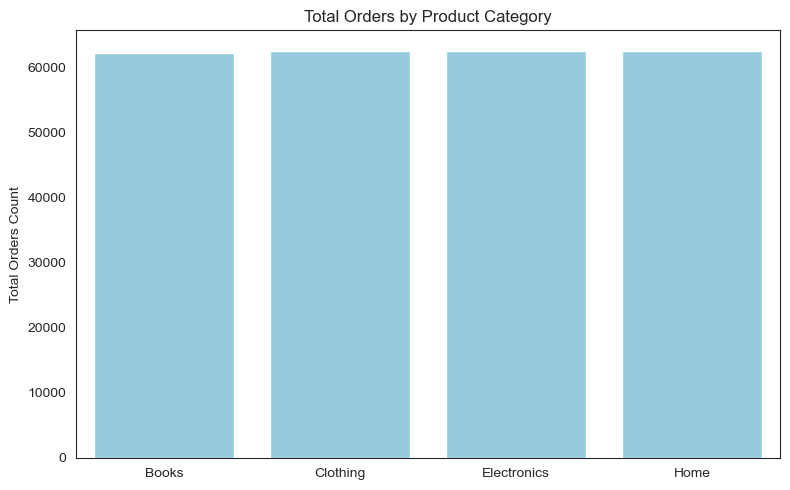

In [127]:
# Total Orders by Product Category

plt.figure(figsize = (8,5))
sns.barplot(data = product_master_data, x = product_master_data['Product Category'], y = product_master_data['total_orders'], color = 'skyblue') # we can use edgecolor='black' to order the bars

# Label and title

plt.title('Total Orders by Product Category')
plt.xlabel('')
plt.ylabel('Total Orders Count')
plt.tight_layout()

# Save plots

plt.savefig('total orders by product category.png', dpi=300, bbox_inches='tight')  # PNG file
plt.savefig('total orders by product category.pdf', bbox_inches='tight')

# Show plot

plt.show()

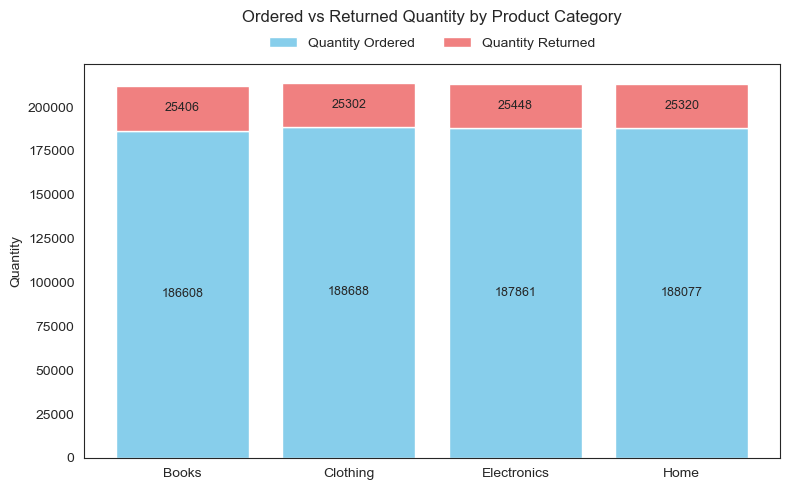

In [129]:
# Creating a stacked bar graph for total quantity purchased and returned

plt.figure(figsize = (8, 5))

# Loop over rows of the DataFrame

for i, row in product_master_data.iterrows():
    category = row['Product Category']
    ordered = row['total_quantity_purchased']
    returned = row['total_returns']

    # Draw stacked bars: base bar
    plt.bar(i, ordered, color='skyblue', label='Quantity Ordered' if i == 0 else "") # if edge colour is needed, edgecolor='black'
    # Stack bar on top
    plt.bar(i, returned, bottom=ordered, color='lightcoral', label='Quantity Returned' if i == 0 else "") # if edge colour is needed, edgecolor='black'

    # Add value labels
    plt.text(i, ordered / 2, f'{ordered:.0f}', ha = 'center', va = 'center', fontsize = 9)
    plt.text(i, ordered + returned / 2, f'{returned:.0f}', ha = 'center', va = 'center', fontsize = 9)

# Set x-ticks to product categories

plt.xticks(ticks = range(len(product_master_data)), labels = product_master_data['Product Category'], rotation = 0)

# Add labels and title

plt.ylabel('Quantity')
plt.xlabel('')
plt.title('Ordered vs Returned Quantity by Product Category', pad = 30)
plt.legend(loc = 'upper center',
    bbox_to_anchor=(0.5, 1.1),  # push legend fully outside top right
    frameon = False,
    ncol = 2)  # number of columns for horizontal layout)

plt.tight_layout()

# Save and show

plt.savefig('stacked_quantity_ordered_returned_by_category.png', dpi = 300, bbox_inches = 'tight')
plt.savefig('stacked_quantity_ordered_returned_by_category.pdf', bbox_inches = 'tight')

# Show plot

plt.show()

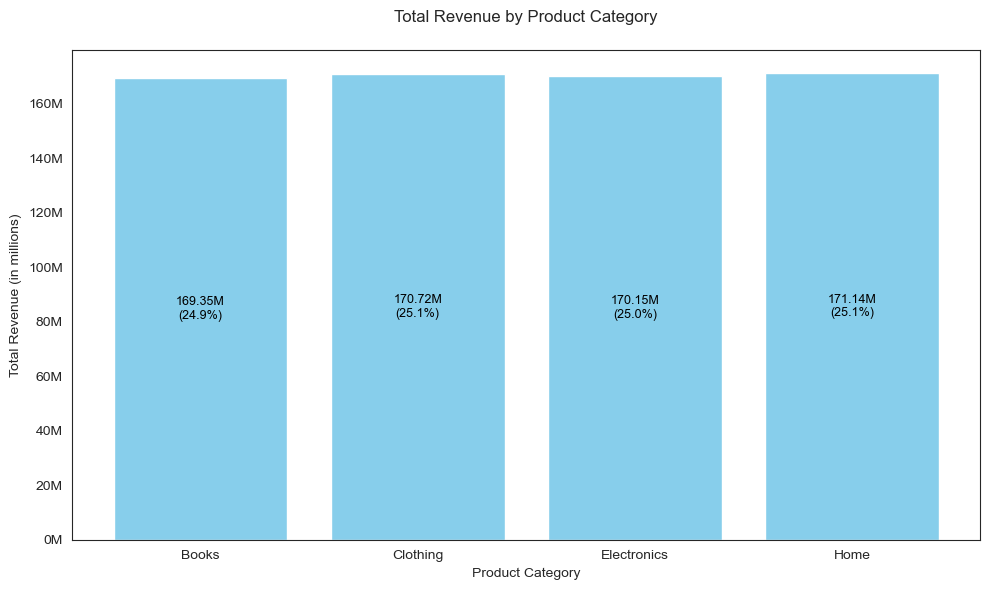

In [131]:
# Total Revenue by Product Category

# Function to format y-axis in millions

def millions(x, pos):
    return f'{x * 1e-6:.0f}M'

plt.figure(figsize=(10, 6))

# Plot bars

bars = plt.bar(
    product_master_data['Product Category'],
    product_master_data['total_revenue'],
    color='skyblue'
)

# Add revenue label inside each bar

for bar, revenue, percent in zip(bars, product_master_data['total_revenue'], product_master_data['%_revenue_of_total']):
    height = bar.get_height()
    label = f'{revenue/1e6:.2f}M\n({percent:.1f}%)'
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height / 2,  # Inside the bar
        label,
        ha='center', va='center',
        fontsize=9, color='black'
    )

# Customize axes

plt.xticks()
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (in millions)')
plt.title('Total Revenue by Product Category', pad=20)

# Format y-axis ticks in millions

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions))

plt.tight_layout()

# Save Plots

plt.savefig('total_revenue_inside_bars.png', dpi=300, bbox_inches='tight')
plt.savefig('total_revenue_inside_bars.pdf', bbox_inches='tight')

# Show Plot

plt.show()

## Results
1. The dataset contains information about the customer, product category, orders, sales and churn.
2. Dataset cleaned and consistency was maintained.
3. Feature engineering was performed for proper analysis.
4. Analysis indicates no significant differences in total revenue, orders, gender, product category and payment methods over age distribution or years.
5. It was found that customer churn dropped over the years. This suggest that the company products and business strategy is improving.

## Recommendations
1. It is recommended that the business strategy needs further improvement to increase the sales and revenue.
2. Further analysis using other tools is recommended to retain the customers and predict customer chunrn.
3. It is surprising to observe that all analysed parameters such as total revenue, sales, payment methods show no change in different age category and need further analysis.
4. It is also recommended to find the cause of no change in payment methods during the Covid19 breakout as one would expect an increase in cashless transaction i.e. Credit Card and PayPal.